In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("car_dataset2.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


## Statistical Analysis

In [3]:
df.corr()

C:\Users\Maaz\AppData\Local\Temp\ipykernel_4496\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,selling_price,km_driven
year,1.000000,0.413922,-0.419688
selling_price,0.413922,1.000000,-0.192289
km_driven,-0.419688,-0.192289,1.000000


In [4]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


## Performing EDA on the Data

Text(0, 0.5, 'Total Cars')

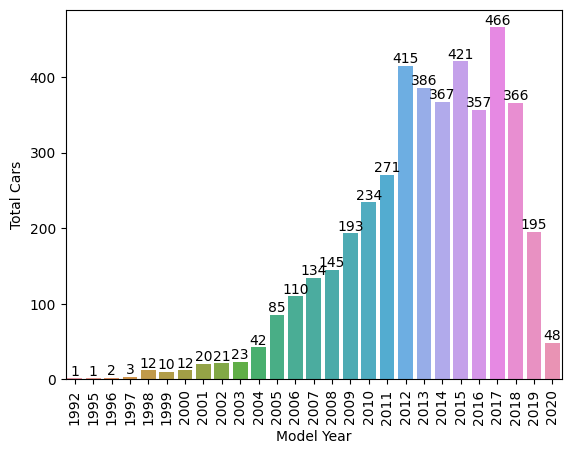

In [6]:
# 1. Let's find out no.of of car's per model year
year = dict(df['year'].value_counts())
ax = sns.barplot(x=list(year.keys()),y=list(year.values()))
for i in ax.containers:
    ax.bar_label(i,"")
plt.xticks(rotation=90)
plt.xlabel("Model Year")
plt.ylabel("Total Cars")

Text(0, 0.5, 'TOTAL')

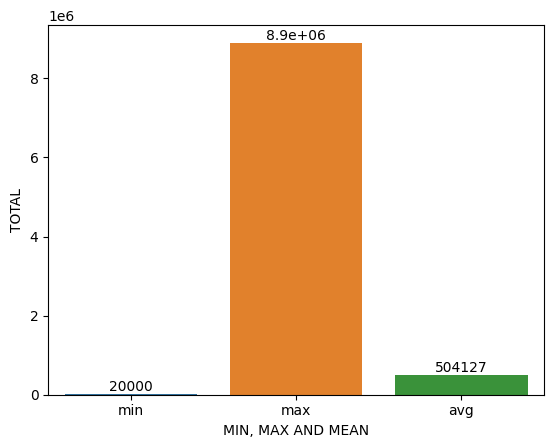

In [7]:
# 2. Let's find out avg, min and max selling_price

total = {'min':df['selling_price'].min(),'max':df['selling_price'].max(),'avg':df['selling_price'].mean()}
ax = sns.barplot(x=list(total.keys()),y=list(total.values()))
for i in ax.containers:
    ax.bar_label(i,"")
plt.xlabel("MIN, MAX AND MEAN")
plt.ylabel("TOTAL")

Text(0, 0.5, 'TOTAL')

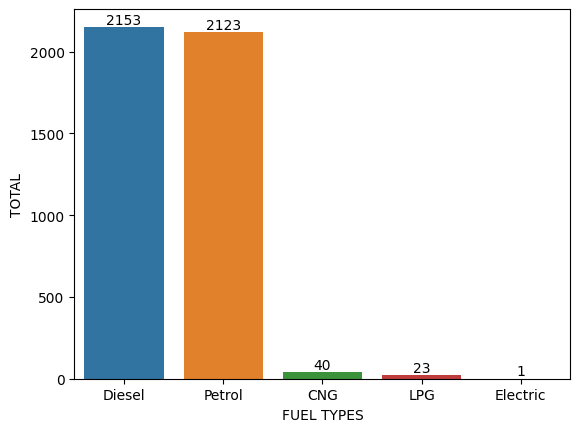

In [8]:
# 3. Let's find out count of fuel types

fuel = dict(df['fuel'].value_counts())
ax = sns.barplot(x=list(fuel.keys()),y=list(fuel.values()))
for i in ax.containers:
    ax.bar_label(i,"")
plt.xlabel("FUEL TYPES")
plt.ylabel("TOTAL")

Text(0, 0.5, 'TOTAL')

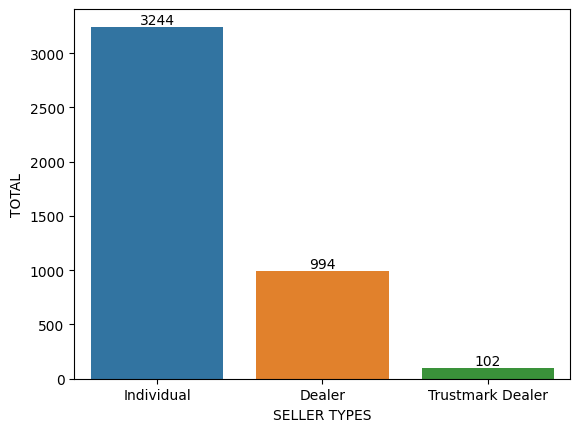

In [9]:
# 4. Let's find out Seller_types

seller_type = dict(df['seller_type'].value_counts())
ax = sns.barplot(x=list(seller_type.keys()),y=list(seller_type.values()))
for i in ax.containers:
    ax.bar_label(i,"")
plt.xlabel("SELLER TYPES")
plt.ylabel("TOTAL")

Text(0, 0.5, 'TOTAL')

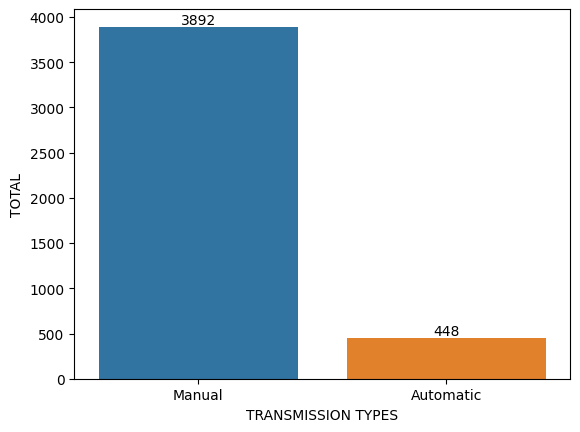

In [10]:
# 5. Let's find out transmission types

transmission = dict(df['transmission'].value_counts())
ax = sns.barplot(x=list(transmission.keys()),y=list(transmission.values()))
for i in ax.containers:
    ax.bar_label(i,"")
plt.xlabel("TRANSMISSION TYPES")
plt.ylabel("TOTAL")

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'First Owner'),
  Text(1, 0, 'Second Owner'),
  Text(2, 0, 'Third Owner'),
  Text(3, 0, 'Fourth & Above Owner'),
  Text(4, 0, 'Test Drive Car')])

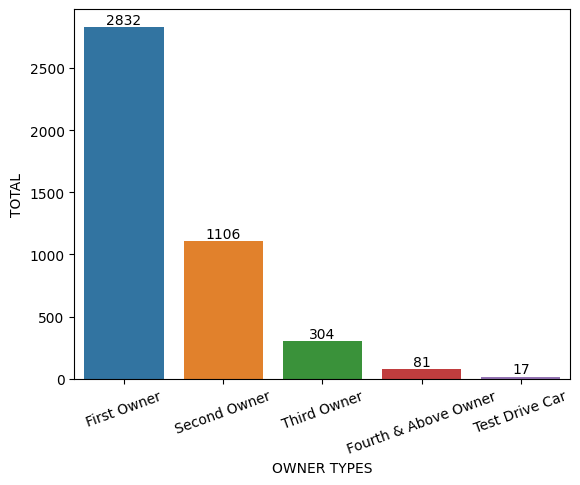

In [11]:
# 6. Let's find out owner types
owner = dict(df['owner'].value_counts())
ax = sns.barplot(x=list(owner.keys()),y=list(owner.values()))
for i in ax.containers:
    ax.bar_label(i,"")
plt.xlabel("OWNER TYPES")
plt.ylabel("TOTAL")
plt.xticks(rotation=20)

### Finding out relationship's between the features



Text(0, 0.5, 'SELLING PRICE')

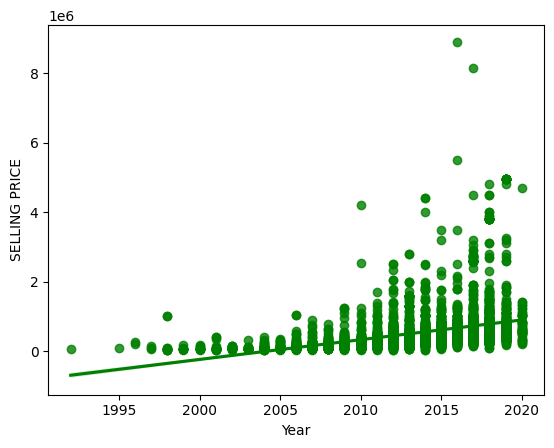

In [12]:
# 1. Year vs Selling_Price

sns.regplot(x=df['year'],y=df['selling_price'],color='green')
plt.xlabel("Year")
plt.ylabel("SELLING PRICE")



Text(0, 0.5, 'SELLING PRICE')

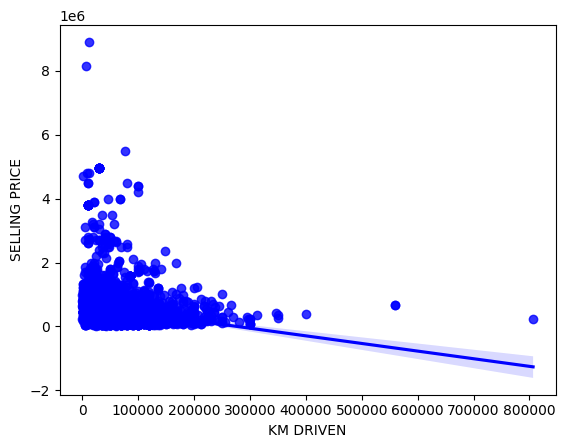

In [13]:
# 2. Km_Driven vs Selling_price

sns.regplot(x=df['km_driven'],y=df['selling_price'],color='blue')
plt.xlabel("KM DRIVEN")
plt.ylabel("SELLING PRICE")

## Performing Data Pre Processing

In [14]:
# 1. Removing Unwanted Features

df = df[['year','selling_price','km_driven','fuel','seller_type','transmission','owner']]

In [15]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [16]:
# 2. Encoding the Categorical Features

df.replace({'fuel':{'Petrol':0,'Diesel':1,'LPG':2,'CNG':3,'Electric':4},'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2},'transmission':{'Manual':0,'Automatic':1},'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)

C:\Users\Maaz\AppData\Local\Temp\ipykernel_4496\2479525835.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({'fuel':{'Petrol':0,'Diesel':1,'LPG':2,'CNG':3,'Electric':4},'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2},'transmission':{'Manual':0,'Automatic':1},'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)


In [17]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,0,0,0,0
1,2007,135000,50000,0,0,0,0
2,2012,600000,100000,1,0,0,0
3,2017,250000,46000,0,0,0,0
4,2014,450000,141000,1,0,0,1


In [18]:
# 3. Scaling/Normalizing the data

# df['selling_price'] = (df['selling_price']/df['selling_price'].max())
# df['km_driven'] = (df['km_driven'] /df['km_driven'].max())

In [19]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,0,0,0,0
1,2007,135000,50000,0,0,0,0
2,2012,600000,100000,1,0,0,0
3,2017,250000,46000,0,0,0,0
4,2014,450000,141000,1,0,0,1


In [20]:
df2 = df

## Developing The Regression Model without scaling/normalizing the features

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [22]:
model = LinearRegression()
model

LinearRegression()

In [23]:
X = df[['year','km_driven','fuel','seller_type','transmission','owner']]
Y = df['selling_price']

In [24]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [25]:
model.fit(x_train,y_train)

LinearRegression()

In [26]:
score = model.score(x_test,y_test)
score

0.35719070005072695

In [27]:
pred = model.predict(x_test)
pred

array([ 495157.51666744,   78430.54924028,  657950.52422944,
        639080.75916742,  604668.9886391 ,  311249.49437071,
        711232.05981979,  230027.96468371,  -34449.96622913,
        740926.38908261,  404532.47153187,  400177.7272971 ,
        411600.3025431 ,   68777.01446882,  489050.39373216,
       1635812.6125697 ,  550942.77808201,  607932.78788565,
        438748.26139061,  498105.91745839,  494270.58158208,
        460738.86444029,  321556.60667871,  646092.96071652,
        484770.25694752,   75271.82709593, 1596420.91267647,
        388468.64285903,    3491.5543613 ,  542637.51513672,
        643208.52027474,  800420.12471047,  622173.56370589,
        507243.54506221,  311936.02492227,  658758.85662806,
        -39805.63588886, -130761.49159317,  376882.94620058,
         80570.61763258,  465755.61263564,   96718.96503115,
         75271.82709593,   58761.77995791,  311725.70356886,
        453669.58424085,  579102.42048359,  524051.84441866,
        365992.93989623,

In [28]:
r2 = r2_score(y_test,pred)
r2

0.35719070005072695

Text(0, 0.5, 'Predicted Values')

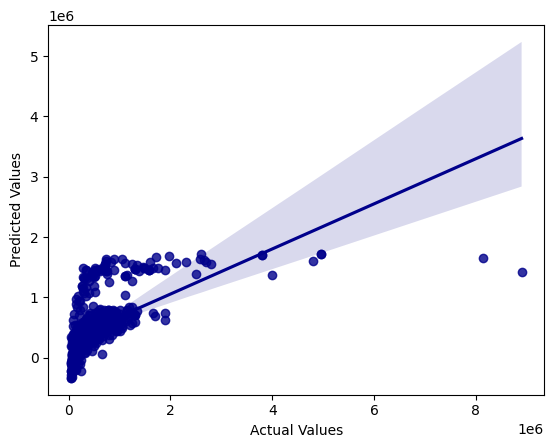

In [29]:
sns.regplot(x=y_test,y=pred,color='darkblue')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

## Developing the Regression Model After Scaling/Normalizing the features 

In [30]:
df2['selling_price'] = (df2['selling_price']/df2['selling_price'].max())
df2['km_driven'] = (df2['km_driven']/df2['km_driven'].max()) 
# df2['year'] = (df2['year']/df2['year'].max())

C:\Users\Maaz\AppData\Local\Temp\ipykernel_4496\2674868870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['selling_price'] = (df2['selling_price']/df2['selling_price'].max())
C:\Users\Maaz\AppData\Local\Temp\ipykernel_4496\2674868870.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['km_driven'] = (df2['km_driven']/df2['km_driven'].max())


In [31]:
model2 = LinearRegression()
model2

LinearRegression()

In [32]:
X2 = df2[['year','km_driven','fuel','seller_type','transmission','owner']]
Y2 = df2['selling_price']

In [33]:
x2_train,x2_test,y2_train,y2_test = train_test_split(X2,Y2,test_size=0.2)

In [34]:
model2.fit(x2_train,y2_train)

LinearRegression()

In [35]:
score2 = model2.score(x2_test,y2_test)
score2

0.43477641621005503

In [36]:
pred2 = model2.predict(x2_test)
pred2

array([ 5.27626589e-02,  7.22965639e-02,  6.07320531e-02,  5.96399875e-02,
        6.68937453e-02,  7.56488081e-02,  4.76586172e-02,  6.66239018e-02,
        5.19997320e-02,  4.95666093e-02, -3.08115996e-02,  5.60252699e-02,
        4.81357162e-02,  3.27915751e-02,  6.21050172e-02,  7.19540159e-02,
        6.49407080e-02,  7.80674735e-02,  4.77342757e-02,  6.16293283e-02,
        6.61358160e-02,  8.24654371e-02,  4.65122778e-02,  2.85728776e-02,
        6.98865128e-02,  4.58052556e-02,  3.91514243e-02,  4.83049398e-02,
        5.49147974e-02,  5.79484295e-02,  1.48114928e-01, -1.67314202e-02,
        1.78559637e-01,  8.29169932e-02,  7.90833152e-02,  5.17996326e-02,
        5.42098807e-02,  4.55671782e-02,  5.59158017e-02,  3.33332244e-02,
        2.17239984e-02,  6.39349088e-02,  8.32263983e-02,  6.27078320e-02,
        3.56388049e-02,  1.63391689e-01,  6.04158635e-02,  8.64497366e-02,
        6.51060809e-02,  5.84154859e-02,  3.83277978e-02,  5.80355310e-02,
        5.09699969e-02,  

In [37]:
r2_2 = r2_score(y2_test,pred2)
r2_2

0.43477641621005503

Text(0, 0.5, 'Predicted Values')

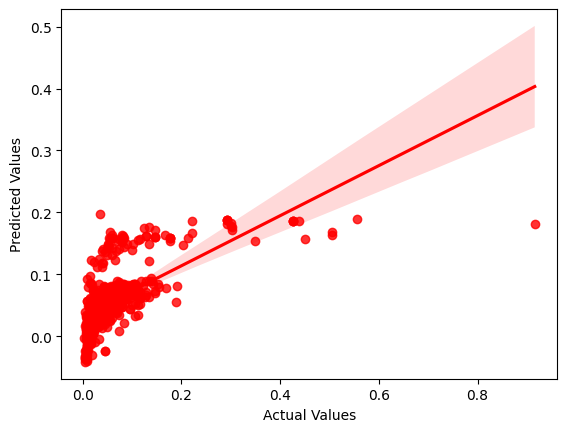

In [38]:
sns.regplot(x=y2_test,y=pred2,color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")